## Import package

In this example, `numpy` is needed for the basic linear algebra. For visualization, animation and general plotting, we need `matplotlib`. If you have not installed these libraries yet, you can do so by typing in your terminal:

`pip install matplotlib`

`pip install numpy`


In [1]:
import numpy as np
import math
import cmath
import matplotlib.pyplot as plt

## Example 1: 1D atomic chain w/ hydrogen atom

Define model and Hamiltonian

In [2]:
### 1D ###

a = 1 # lattice constant
N = 50  # number of atoms
L = a*N # length

ee=0.25 # <n|H|n>
tt=0.50 # <n|H|m> n=m+-1

hh=np.zeros((N,N),float)

for i in range (0,N):
    hh[i][i]=ee
    if i==N-1:
        pass
    else:
        hh[i][i+1]=-tt
        hh[i+1][i]=-tt

print (hh)

[[ 0.25 -0.5   0.   ...  0.    0.    0.  ]
 [-0.5   0.25 -0.5  ...  0.    0.    0.  ]
 [ 0.   -0.5   0.25 ...  0.    0.    0.  ]
 ...
 [ 0.    0.    0.   ...  0.25 -0.5   0.  ]
 [ 0.    0.    0.   ... -0.5   0.25 -0.5 ]
 [ 0.    0.    0.   ...  0.   -0.5   0.25]]


Solving Hamiltonian and plot band

<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\e'
<>:22: SyntaxWarning: invalid escape sequence '\e'
<>:22: SyntaxWarning: invalid escape sequence '\e'
<>:22: SyntaxWarning: invalid escape sequence '\e'
<>:22: SyntaxWarning: invalid escape sequence '\e'
<>:22: SyntaxWarning: invalid escape sequence '\e'
<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:11: SyntaxWarning: invalid escape sequence '\p'
<>:20: SyntaxWarning: invalid escape sequence '\e'
<>:22: SyntaxWarning: invalid escape sequence '\e'
<>:22: SyntaxWarning: invalid escape sequence '\e'
<>:22: SyntaxWarning: invalid escape sequence '\e'
<>:22: SyntaxWarning: invalid escape sequence '\e'
<>:22: SyntaxWarning: invalid escape sequence '\e'
/var/folders/_d/ykv8tsb14qv780dzvt7sq8k40000gn/T/ipykernel_15490/24456596.py:10: SyntaxWarning: invalid escape sequence '\p'
  xlabels[0] = '$-\\frac{\pi}{a}$'
/var/folders/_d/ykv8tsb1

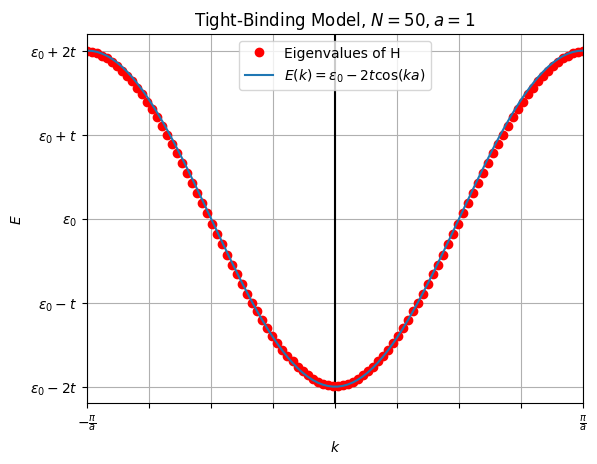

In [3]:
eigenvalues, eigenvectors = np.linalg.eigh(hh)
numerical = np.concatenate((np.flip(eigenvalues, 0), eigenvalues), axis=0)

kk = np.linspace(-np.pi/a, np.pi/a, 2*L)

exact = ee - 2.*tt*np.cos(kk*a)

xticks = np.linspace(-np.pi/a, np.pi/a, 9)
xlabels = ['' for kk in xticks]
xlabels[0] = '$-\\frac{\pi}{a}$'
xlabels[-1] = '$\\frac{\pi}{a}$'

fig, axs=plt.subplots()
axs.set_xlim(-np.pi/a, np.pi/a)
axs.set_title('Tight-Binding Model, $N='+str(N)+', a='+str(a)+'$')
axs.set_ylabel('$E$')
axs.set_xlabel('$k$')
axs.axvline(x=0., color='k')
axs.plot(kk, numerical, 'ro', label='Eigenvalues of H')
axs.plot(kk, exact, label='$E(k) = \epsilon_0 - 2 t \cos(ka)$')
axs.set_yticks([ee-2.*tt, ee-tt, ee, ee+tt, ee+2.*tt])
axs.set_yticklabels(['$\epsilon_0-2t$', '$\epsilon_0-t$', '$\epsilon_0$', '$\epsilon_0+t$', '$\epsilon_0+2t$'])
axs.set_xticks(xticks)
axs.set_xticklabels(xlabels)
axs.legend()
axs.grid(True)

plt.show()

## Example 2: 1D atomic chain w/ s and p orbitals

Define Hamiltonian

In [4]:
def hh(k,es,ep,sss,pps,sps):
    return np.array([
   [es-2*sss*math.cos(k*a),1j*sps*math.sin(k*a) ],
   [-1j*sps*math.sin(k*a), ep-2*pps*math.cos(k*a)]])

Set hopping parameter

In [5]:
params = (0, 1, -0.5, 0.5, 0) # es, ep, sss, pps, sps
# params = (0, 1, -0.5, 0.5, 0.1) # es, ep, sss, pps, sps

Solving Hamiltonian and plot bands

<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\p'
<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\p'
/var/folders/_d/ykv8tsb14qv780dzvt7sq8k40000gn/T/ipykernel_15490/2011842616.py:18: SyntaxWarning: invalid escape sequence '\p'
  xlabels[0] = '$-\\frac{\pi}{a}$'
/var/folders/_d/ykv8tsb14qv780dzvt7sq8k40000gn/T/ipykernel_15490/2011842616.py:19: SyntaxWarning: invalid escape sequence '\p'
  xlabels[-1] = '$\\frac{\pi}{a}$'


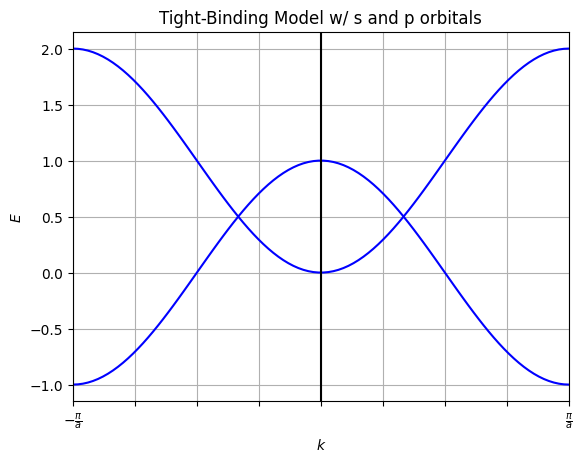

In [6]:
band=[]

for i in range (0,2*L):
    kx=kk[i]
    eigenvalues = np.linalg.eigvalsh(hh(kx,*params))
    band.append(eigenvalues)

band=np.array(band)
num_bands = len(band[1])

fig, axs=plt.subplots()

for i in range (0,num_bands):
    axs.plot(kk, band[:, i], 'b-')

xticks = np.linspace(-np.pi/a, np.pi/a, 9)
xlabels = ['' for k in xticks]
xlabels[0] = '$-\\frac{\pi}{a}$'
xlabels[-1] = '$\\frac{\pi}{a}$'

axs.set_xlim(-np.pi/a, np.pi/a)
axs.set_title('Tight-Binding Model w/ s and p orbitals')
axs.set_ylabel('$E$')
axs.set_xlabel('$k$')
axs.axvline(x=0., color='k')
axs.set_xticks(xticks)
axs.set_xticklabels(xlabels)
axs.grid(True)

plt.show()

## Example 3: Electronic structure of silicon, NN hopping

define crystal structure and reciprocal space

In [7]:
a = 1.0 # lattice constant
x = np.array([1,0,0])
y = np.array([0,1,0])
z = np.array([0,0,1])

####### lattice vector ########

a1=a/2*(y+z)
a2=a/2*(z+x)
a3=a/2*(x+y)

####### reciprocal lattice vector ########

#b1=(2*math.pi)/a*(-x+y+z)
#b2=(2*math.pi)/a*(x-y+z)
#b3=(2*math.pi)/a*(x+y-z)

volume = np.dot(a1, np.cross(a2, a3))

b1 = (2 * math.pi / volume) * np.cross(a2, a3)
b2 = (2 * math.pi / volume) * np.cross(a3, a1)
b3 = (2 * math.pi / volume) * np.cross(a1, a2)

bb=np.array([b1,b2,b3])

##### kpoints path #####

L=np.array([0.5,0.5,0.5])
G=np.array([0.0,0.0,0.0])
X=np.array([0.5,0.5,0.0])
K=np.array([0.625,0.625,0.25])
G2=np.array([1.0,1.0,1.0])

LL = np.dot(L,bb)
GG = np.dot(G,bb)
XX = np.dot(X,bb)
KK = np.dot(K,bb)
GG2 = np.dot(G2,bb)

kkk=np.array([LL,GG,XX,KK,GG2])

nk = 5
dkk = 100.
dk = int(dkk)

yyy = (nk-1)*dk+1
karray = np.zeros((yyy,3),float)

for i in range(0,nk-1):
    for j in range (0,dk):
        karray[i*dk+j][0] = kkk[i][0] + (kkk[i+1][0] - kkk[i][0])/dkk*j
        karray[i*dk+j][1] = kkk[i][1] + (kkk[i+1][1] - kkk[i][1])/dkk*j
        karray[i*dk+j][2] = kkk[i][2] + (kkk[i+1][2] - kkk[i][2])/dkk*j
        if i == nk-2 and j == dk-1:
            karray[i*dk+j+1][0] = kkk[i+1][0]
            karray[i*dk+j+1][1] = kkk[i+1][1]
            karray[i*dk+j+1][2] = kkk[i+1][2]

Construct Hamiltonian

In [8]:
def g(kx,ky,kz):
    return np.array(
[ math.cos(kx/4)*math.cos(ky/4)*math.cos(kz/4)-1j*math.sin(kx/4)*math.sin(ky/4)*math.sin(kz/4) ,
 -math.cos(kx/4)*math.sin(ky/4)*math.sin(kz/4)+1j*math.sin(kx/4)*math.cos(ky/4)*math.cos(kz/4) ,
 -math.sin(kx/4)*math.cos(ky/4)*math.sin(kz/4)+1j*math.cos(kx/4)*math.sin(ky/4)*math.cos(kz/4) ,
 -math.sin(kx/4)*math.sin(ky/4)*math.cos(kz/4)+1j*math.cos(kx/4)*math.cos(ky/4)*math.sin(kz/4)])

# NN hopping model

#def hh(g, es, ep, tss, tsp, txx, txy):
    gc = np.conjugate(g)
    return np.array([
        [         es,  tss * g[0],            0,            0,            0, tsp * g[1], tsp * g[2], tsp * g[3]],
        [tss * gc[0],          es, -tsp * gc[1], -tsp * gc[2], -tsp * gc[3],          0,          0,          0],
        [          0, -tsp * g[1],           ep,            0,            0, txx * g[0], txy * g[3], txy * g[1]],
        [          0, -tsp * g[2],            0,           ep,            0, txy * g[3], txx * g[0], txy * g[1]],
        [          0, -tsp * g[3],            0,            0,           ep, txy * g[1], txy * g[2], txx * g[0]],
        [tsp * gc[1],           0,  txx * gc[0],  txy * gc[3],  txy * gc[1],         ep,         0,           0],
        [tsp * gc[2],           0,  txy * gc[3],  txx * gc[0],  txy * gc[2],          0,        ep,           0],
        [tsp * gc[3],           0,  txy * gc[1],  txy * gc[1],  txx * gc[0],          0,         0,          ep]
    ])

# NNN hopping model

def hh(g, es, ep, tss, tsp, txx, txy, uxx):
    gc = np.conjugate(g)
    return np.array([
        [         es,  tss * g[0],            0,            0,            0, tsp * g[1], tsp * g[2], tsp * g[3]],
        [tss * gc[0],          es, -tsp * gc[1], -tsp * gc[2], -tsp * gc[3],          0,          0,          0],
        [          0, -tsp * g[1],           ep+uxx*math.cos(ky/2)*math.cos(kz/2),            0,            0, txx * g[0], txy * g[3], txy * g[1]],
        [          0, -tsp * g[2],            0,           ep+uxx*math.cos(kz/2)*math.cos(kx/2),            0, txy * g[3], txx * g[0], txy * g[1]],
        [          0, -tsp * g[3],            0,            0,           ep+uxx*math.cos(kx/2)*math.cos(ky/2), txy * g[1], txy * g[2], txx * g[0]],
        [tsp * gc[1],           0,  txx * gc[0],  txy * gc[3],  txy * gc[1],         ep+uxx*math.cos(ky/2)*math.cos(kz/2),         0,           0],
        [tsp * gc[2],           0,  txy * gc[3],  txx * gc[0],  txy * gc[2],          0,        ep+uxx*math.cos(kz/2)*math.cos(kx/2),           0],
        [tsp * gc[3],           0,  txy * gc[1],  txy * gc[1],  txx * gc[0],          0,         0,          ep+uxx*math.cos(kx/2)*math.cos(ky/2)]
    ])


Hopping parameters

In [9]:
# params = ( -4.03, 3.17, -8.13, 5.88, 1.71, 7.51) # es, ep, tss, tsp, txx, txy
params = ( -4.03, 3.17, -8.13, 5.88, 1.71, 7.51,-1.46) # + next nearest neighbor ss hopping

Solving Hamiltonian and plot band

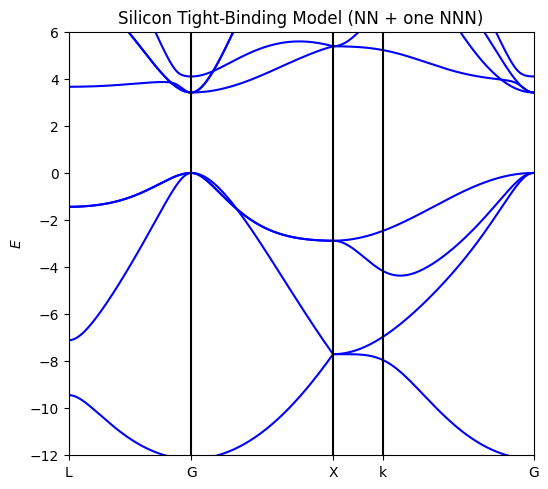

In [10]:
band=[]
kk=[]
skk=[]
k_temp = 0

for i in range (0,yyy):
    ii=(i%dk)
    if i != 0:
        k_temp += math.sqrt((karray[i][0]-karray[i-1][0])**2+(karray[i][1]-karray[i-1][1])**2+(karray[i][2]-karray[i-1][2])**2)
    if ii == 0:
        skk.append(k_temp)
    kk.append(k_temp)
    kx = karray[i][0]
    ky = karray[i][1]
    kz = karray[i][2]
    gg = g(kx,ky,kz)
    eigenvalues = np.linalg.eigvalsh(hh(gg,*params))
    band.append(eigenvalues)

band=np.array(band)
num_bands=len(band[1])

fig, axs=plt.subplots(figsize=(6,5.5))
#fig, axs=plt.subplots()

for i in range (0,num_bands):
    axs.plot(kk, band[:, i], 'b-')

axs.set_xlim(skk[0],skk[4])
#axs.set_title('Silicon Tight-Binding Model (NN)')
axs.set_title('Silicon Tight-Binding Model (NN + one NNN)')
axs.set_ylabel('$E$')
for i in range (0,4):
    axs.axvline(x=skk[i], color='k')
axs.set_xticks([ skk[0],skk[1],skk[2],skk[3],skk[4] ])
axs.set_xticklabels(["L","G","X","k","G"])
axs.set_ylim(-12,6)
axs.set_yticks(np.arange(-12,8,2))

plt.show()

Discussion: including next nearest neighbor interaction

## Example 4: Electronic structure of strained silicon

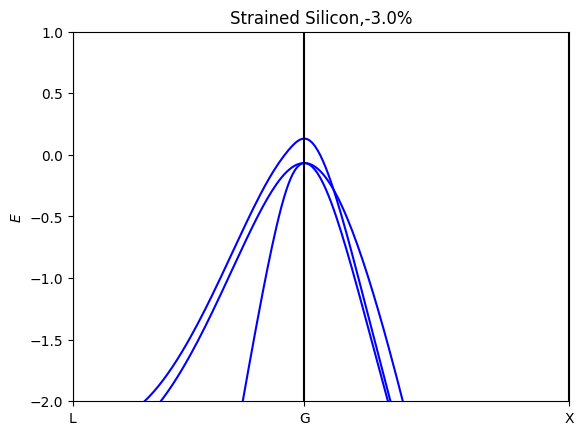

In [11]:
epsilon_xx=-0.03
bp=-2.21

# Construct the deformation tensor (strain tensor, zero Poisson ratio)
strain_tensor = np.array([
    [1 + epsilon_xx, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])

# Now apply the strain tensor to these primitive vectors to get the strained primitive vectors
a1_strained = strain_tensor @ a1
a2_strained = strain_tensor @ a2
a3_strained = strain_tensor @ a3

####### reciprocal lattice vector ########

volume_strained = np.dot(a1_strained, np.cross(a2_strained, a3_strained))

b1_strained = (2 * math.pi / volume_strained) * np.cross(a2_strained, a3_strained)
b2_strained = (2 * math.pi / volume_strained) * np.cross(a3_strained, a1_strained)
b3_strained = (2 * math.pi / volume_strained) * np.cross(a1_strained, a2_strained)

bb_strained = np.array([b1_strained, b2_strained, b3_strained])

##### kpoints path #####

L=np.array([0.5,0.5,0.5])
G=np.array([0.0,0.0,0.0])
X=np.array([0.5,0.5,0.0])

LL = np.dot(L,bb_strained)
GG = np.dot(G,bb_strained)
XX = np.dot(X,bb_strained)

kkk=np.array([LL,GG,XX])

nk = 3
dkk = 100.
dk = int(dkk)

yyy = (nk-1)*dk+1
karray = np.zeros((yyy,3),float)


for i in range(0,nk-1):
    for j in range (0,dk):
        karray[i*dk+j][0] = kkk[i][0] + (kkk[i+1][0] - kkk[i][0])/dkk*j
        karray[i*dk+j][1] = kkk[i][1] + (kkk[i+1][1] - kkk[i][1])/dkk*j
        karray[i*dk+j][2] = kkk[i][2] + (kkk[i+1][2] - kkk[i][2])/dkk*j
        if i == nk-2 and j == dk-1:
            karray[i*dk+j+1][0] = kkk[i+1][0]
            karray[i*dk+j+1][1] = kkk[i+1][1]
            karray[i*dk+j+1][2] = kkk[i+1][2]

####### Constructe Hamiltonian #######

params = ( -4.03, 3.17-bp*2*(-epsilon_xx), 3.17+bp*(-epsilon_xx), -8.13, 5.88,  1.71, 7.51, -1.46) ##  es epx epy tss tspx tspy txx tyy txy tyz

def g(kx,ky,kz):
    return np.array(
[ math.cos(kx/4)*math.cos(ky/4)*math.cos(kz/4)-1j*math.sin(kx/4)*math.sin(ky/4)*math.sin(kz/4) ,
 -math.cos(kx/4)*math.sin(ky/4)*math.sin(kz/4)+1j*math.sin(kx/4)*math.cos(ky/4)*math.cos(kz/4) ,
 -math.sin(kx/4)*math.cos(ky/4)*math.sin(kz/4)+1j*math.cos(kx/4)*math.sin(ky/4)*math.cos(kz/4) ,
 -math.sin(kx/4)*math.sin(ky/4)*math.cos(kz/4)+1j*math.cos(kx/4)*math.cos(ky/4)*math.sin(kz/4)])


def hh(g, es, epx, epy, tss, tsp, txx, txy, uxx):
    gc = np.conjugate(g)
    return np.array([
        [         es,  tss * g[0],            0,            0,            0, tsp * g[1], tsp * g[2], tsp * g[3]],
        [tss * gc[0],          es, -tsp * gc[1], -tsp * gc[2], -tsp * gc[3],          0,          0,          0],
        [          0, -tsp * g[1],           epx+uxx*math.cos(ky/4)*math.cos(kz/4),            0,            0, txx * g[0], txy * g[3], txy * g[1]],
        [          0, -tsp * g[2],            0,           epy+uxx*math.cos(kz/4)*math.cos(kx/4),            0, txy * g[3], txx * g[0], txy * g[1]],
        [          0, -tsp * g[3],            0,            0,           epy+uxx*math.cos(kx/4)*math.cos(ky/4), txy * g[1], txy * g[2], txx * g[0]],
        [tsp * gc[1],           0,  txx * gc[0],  txy * gc[3],  txy * gc[1],         epx+uxx*math.cos(ky/4)*math.cos(kz/4),         0,           0],
        [tsp * gc[2],           0,  txy * gc[3],  txx * gc[0],  txy * gc[2],          0,        epy+uxx*math.cos(kz/4)*math.cos(kx/4),           0],
        [tsp * gc[3],           0,  txy * gc[1],  txy * gc[1],  txx * gc[0],          0,         0,          epy+uxx*math.cos(kx/4)*math.cos(ky/4)]
    ])


band=[]
kk=[]
skk=[]
k_temp = 0

for i in range (0,yyy):
    ii=(i%dk)
    if i != 0:
        k_temp += math.sqrt((karray[i][0]-karray[i-1][0])**2+(karray[i][1]-karray[i-1][1])**2+(karray[i][2]-karray[i-1][2])**2)
    if ii == 0:
        skk.append(k_temp)
    kk.append(k_temp)
    kx = karray[i][0]
    ky = karray[i][1]
    kz = karray[i][2]
    gg = g(kx,ky,kz)
    eigenvalues = np.linalg.eigvalsh(hh(gg,*params))
    band.append(eigenvalues)

band=np.array(band)
num_bands=len(band[1])

fig, axs=plt.subplots()

for i in range (0,num_bands):
    axs.plot(kk, band[:, i], 'b-')

axs.set_xlim(skk[1]-1,skk[1]+1)
axs.set_ylim(-2,1.0)
axs.set_title('Strained Silicon,'+str(round(epsilon_xx*100,1))+'%')
axs.set_ylabel('$E$')
axs.axvline(x=skk[0], color='k')
axs.axvline(x=skk[1], color='k')
axs.axvline(x=skk[2], color='k')
axs.set_xticks([ skk[0],skk[1],skk[2] ])
axs.set_xticklabels(["L","G","X"])
#axs.set_xticks([ skk[1] ])
#axs.set_xticklabels(["G"])

plt.show()



## Additional Discussion: Electronic structure of silicon, conduction band

IndexError: list index out of range

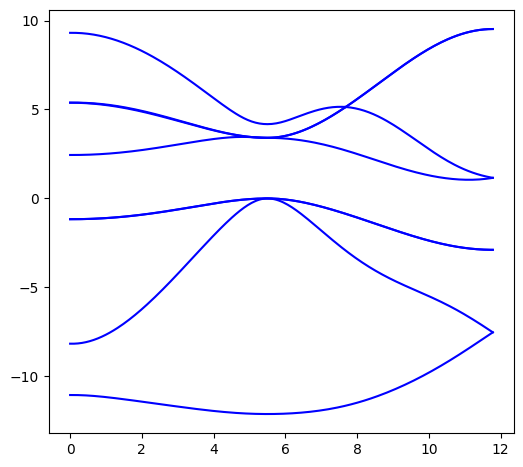

In [12]:
####### Constructe Hamiltonian #######

def H_1NN(R_norm, p):
    l, m, n = R_norm
    E = np.zeros((4, 4), dtype=float)
    
    # John C Slater and George F Koster. Physical review, 94(6):1498, 1954

    # On-diagonal terms are independent of direction
    E[0, 0] = p['ss']
    E[1, 1] = p['xx']
    E[2, 2] = p['xx']
    E[3, 3] = p['xx']
    
    # Off-diagonal terms' signs depend on the direction cosines
    E[0, 1] = np.sign(l) * p['sx'] 
    E[0, 2] = np.sign(m) * p['sx'] 
    E[0, 3] = np.sign(n) * p['sx'] 
    
    E[1, 0] = -E[0, 1]
    E[2, 0] = -E[0, 2]
    E[3, 0] = -E[0, 3]

    E[1, 2] = np.sign(l*m) * p['xy'] 
    E[1, 3] = np.sign(l*n) * p['xy'] 
    E[2, 3] = np.sign(m*n) * p['xy'] 
    
    # Make symmetric
    E[2, 1] = E[1, 2]
    E[3, 1] = E[1, 3]
    E[3, 2] = E[2, 3]
    
    return E

def H_2NN(R_norm, p):
    l, m, n = R_norm
    E = np.zeros((4, 4), dtype=float)
    E[0, 0] = p['ss']
    # Exx
    E[1, 1] = p['xx_110'] if l != 0 else p['xx_011']
    E[2, 2] = p['xx_110'] if m != 0 else p['xx_011']
    E[3, 3] = p['xx_110'] if n != 0 else p['xx_011']
    # Exy
    if n == 0: # Vector is in the xy-plane, e.g., (1,1,0)
        E[1, 2] = np.sign(l*m) * p['xy_110'] 
    elif l == 0: # Vector is in the yz-plane, e.g., (0,1,1)
        E[2, 3] = np.sign(m*n) * p['xy_110']
    elif m == 0: # Vector is in the xz-plane, e.g., (1,0,1)
        E[1, 3] = np.sign(l*n) * p['xy_110']
    E[2, 1], E[3, 1], E[3, 2] = E[1, 2], E[1, 3], E[2, 3]

    # s-p terms, sx_110
    E[0, 1] = np.sign(l) * p['sx_110'] if l != 0 else 0
    E[0, 2] = np.sign(m) * p['sx_110'] if m != 0 else 0
    E[0, 3] = np.sign(n) * p['sx_110'] if n != 0 else 0

    E[1, 0] = -E[0, 1]
    E[2, 0] = -E[0, 2]
    E[3, 0] = -E[0, 3]

    return E

def H_3NN(R_norm, p):
    l, m, n = R_norm
    E = np.zeros((4, 4), dtype=float)
    
    # On-diagonal terms
    E[0, 0] = p['ss']
    l_abs, m_abs, n_abs = np.abs(R_norm)
    max_comp = max(l_abs, m_abs, n_abs)
    
    E[1, 1] = p['xx_311'] if l_abs == max_comp else p['xx_113']
    E[2, 2] = p['xx_311'] if m_abs == max_comp else p['xx_113']
    E[3, 3] = p['xx_311'] if n_abs == max_comp else p['xx_113']

    if n_abs == max_comp:     
        E[1, 2] = np.sign(l*m) * p['xy_113']
        E[1, 3] = np.sign(l*n) * p['xy_311'] 
        E[2, 3] = np.sign(m*n) * p['xy_311'] 
    elif l_abs == max_comp:   
        E[2, 3] = np.sign(m*n) * p['xy_113']
        E[1, 2] = np.sign(l*m) * p['xy_311']
        E[1, 3] = np.sign(l*n) * p['xy_311']
    elif m_abs == max_comp:   
        E[1, 3] = np.sign(l*n) * p['xy_113']
        E[1, 2] = np.sign(l*m) * p['xy_311']
        E[2, 3] = np.sign(m*n) * p['xy_311']
    E[2, 1], E[3, 1], E[3, 2] = E[1, 2], E[1, 3], E[2, 3]

    # s-p terms
    E[0, 1] = np.sign(l) * (p['sx_311'] if l_abs == max_comp else  p['sx_113'])
    E[0, 2] = np.sign(m) * (p['sx_311'] if m_abs == max_comp else  p['sx_113'])
    E[0, 3] = np.sign(n) * (p['sx_311'] if n_abs == max_comp else  p['sx_113'])

    E[1, 0] = -E[0, 1]
    E[2, 0] = -E[0, 2]
    E[3, 0] = -E[0, 3]
    
    return E

def HH(k, E_onsite, P_1NN, P_2NN, P_3NN):
    H = np.zeros((8, 8), dtype=complex)
    H[0, 0], H[4, 4] = E_onsite['s'], E_onsite['s']
    for i in [1, 2, 3, 5, 6, 7]: H[i, i] = E_onsite['p']

    # --- 1st Nearest Neighbor ---
    R_1NN = (1.0 / 4.0) * np.array([[1, 1, 1], [1, -1, -1], [-1, 1, -1], [-1, -1, 1]])
    for R in R_1NN:
        phase = np.exp(1j * np.dot(k, R)) 
        R_norm = R / np.linalg.norm(R)
        E_block = H_1NN(R_norm, P_1NN)
        H[0:4, 4:8] += phase * E_block

    # --- 2nd Nearest Neighbor ---
    R_2NN = (1.0 / 2.0) * np.array([
        [1, 1, 0], [-1, -1, 0], [1, -1, 0], [-1, 1, 0],
        [1, 0, 1], [-1, 0, -1], [1, 0, -1], [-1, 0, 1],
        [0, 1, 1], [0, -1, -1], [0, 1, -1], [0, -1, 1]
    ])
    for R in R_2NN:
        phase = np.exp(1j * np.dot(k, R)) 
        R_norm = R / np.linalg.norm(R)
        E_block = H_2NN(R_norm, P_2NN)
        H[0:4, 0:4] += phase * E_block
        H[4:8, 4:8] += phase * E_block

    # --- 3rd Nearest Neighbor ---
    R_3NN = (1.0 / 4.0) * np.array([
        [3, -1, 1], [3, 1, -1], [-3, 1, 1], [-3, -1, -1],
        [1, 3, -1], [-1, 3, 1], [1, -3, 1], [-1, -3, -1],
        [-1, 1, 3], [1, -1, 3], [1, 1, -3], [-1, -1, -3]
    ])
    for R in R_3NN:
        phase = np.exp(1j * np.dot(k, R))
        R_norm = R / np.linalg.norm(R)
        E_block = H_3NN(R_norm, P_3NN)
        H[0:4, 4:8] += phase * E_block

    H[4:8, 0:4] = H[0:4, 4:8].conj().T
    return H


# phys. stat. sol. (b), 68: 405-419 (1975)

#E_onsite = {'s': -3., 'p': 4.2}
#P_1NN = {    'ss': -8.13/4.0, 'sx': 5.88/4.0, 'xx': 1.71/4.0, 'xy': 7.51/4.0}

# Physical Review B, 47(12), 7104 (1993)

E_onsite = {'s': -6.3193, 'p': 2.2494}
P_1NN = {    'ss': -1.8376, 'sx': 1.0087, 'xx': 0.3209, 'xy': 1.4889}
P_2NN = {    'ss': 0.1940, 'sx_110': -0.1840, 'sx_011':  0 , 'xx_110': 0.0626, 'xx_011': -0.2646, 'xy_110': -0.0378, 'xy_011': 0 }
P_3NN = {    'ss':-0.0674, 'sx_311':  0.2717, 'sx_113': -0.1262 , 'xx_311': 0.0869, 'xx_113':  0.0094,  'xy_311':  0.0152, 'xy_113':  0.0952 }

###############

band=[]
kk=[]
skk=[]
k_temp = 0

for i in range (0,yyy):
    ii=(i%dk)
    if i != 0:
        k_temp += math.sqrt((karray[i][0]-karray[i-1][0])**2+(karray[i][1]-karray[i-1][1])**2+(karray[i][2]-karray[i-1][2])**2)
    if ii == 0:
        skk.append(k_temp)
    kk.append(k_temp)
    kx = karray[i][0]
    ky = karray[i][1]
    kz = karray[i][2]
#   gg = g(kx,ky,kz)
    kkkk = (kx,ky,kz)
    eigenvalues = np.linalg.eigvalsh(HH(kkkk,E_onsite, P_1NN, P_2NN, P_3NN))
    band.append(eigenvalues)

band=np.array(band)
num_bands=len(band[1])

#fig, axs=plt.subplots()
fig, axs=plt.subplots(figsize=(6,5.5))

for i in range (0,num_bands):
    axs.plot(kk, band[:, i], 'b-')

axs.set_xlim(skk[0],skk[4])
axs.set_title('Silicon Tight-Binding Model (up to 3rd NN)')
axs.set_ylabel('$E$')
for i in range (0,4):
    axs.axvline(x=skk[i], color='k')
axs.set_xticks([ skk[0],skk[1],skk[2],skk[3],skk[4]])
axs.set_xticklabels(["L","G","X","K","G"])
axs.set_yticks(np.arange(-12,8,2))
axs.set_ylim(-12,6)

plt.show()
